In [1]:
import tensorflow as tf;
import os;
import numpy as np;
import re;
from PIL import Image;
import matplotlib.pyplot as plt;

F:/retrain/trimg/0002.jpg


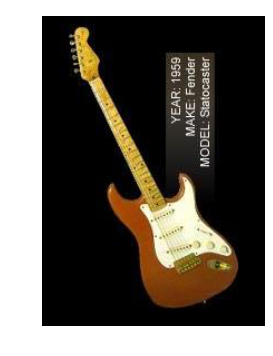

[2 1 0]
0.984513
0.00906086
0.00642598
F:/retrain/trimg/0013.jpg


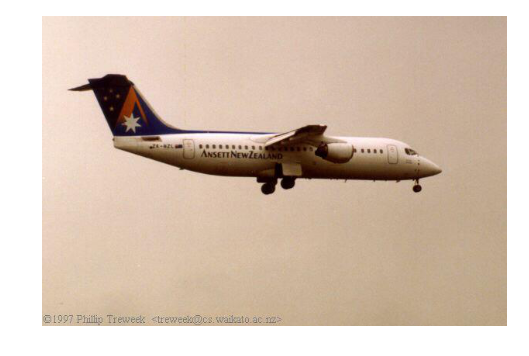

[1 0 2]
0.984958
0.00758737
0.00745443
F:/retrain/trimg/image_00061.jpg


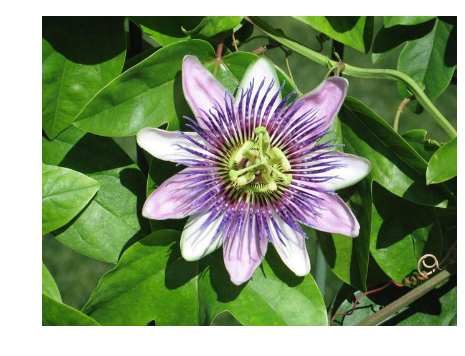

[0 1 2]
0.991243
0.00448159
0.0042756

完成


In [12]:
label_path="F:/retrain/output_labels.txt";
pb_path="F:/retrain/output_graph.pb";
img_path="F:/retrain/trimg/";
lines = tf.gfile.GFile(label_path).readlines();
uid_to_human={};
for uid,line in enumerate(lines):
    line = line.strip('\n');
    uid_to_human[uid]=line;

def id_to_string(node_id):
    if node_id not in uid_to_human:
        return ""
    return uid_to_human[node_id];

#create one graphic to keep train model
with tf.gfile.FastGFile(pb_path,"rb") as f:
    graphic_def = tf.GraphDef();
    graphic_def.ParseFromString(f.read());
    tf.import_graph_def(graphic_def,name="");

with tf.Session() as sess:
    softmax_tensor = sess.graph.get_tensor_by_name("final_result:0");
    #遍历目录
    for root,dirs,files in os.walk(img_path):
        for file in files:
            image_path = os.path.join(root,file);
            image_data = tf.gfile.FastGFile(image_path,"rb").read();
            prediction = sess.run(softmax_tensor,{"DecodeJpeg/contents:0":image_data});
            prediction = np.squeeze(prediction);
        
            #print image and  path
            print(image_path);
            #show image 
            img=Image.open(image_path);
            plt.imshow(img);
            plt.axis("off");
            plt.show();
        
            #排序
            top_k=prediction.argsort()[::-1];
            print(top_k);
            for node_id in top_k:
                hum_string = id_to_string(node_id);
                score = prediction[node_id];
                print(score);
        print("");
    print("完成");